In [1]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

# Efficient Looping
import itertools

# Traceback for diagnosis
import traceback

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson, kstest
import math

# Feature Selection
from sklearn.feature_selection import (
    RFECV, SelectKBest, chi2, f_classif, f_regression,
    mutual_info_classif, mutual_info_regression
)

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import (
    StratifiedKFold, KFold, 
    RepeatedKFold, RepeatedStratifiedKFold,
    train_test_split, TimeSeriesSplit
)

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor, 
    AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# ML classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier, 
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier,ExtraTreesClassifier
    )
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Clustering algorithms
from sklearn.cluster import KMeans

# Fine-tuning 
import optuna

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# OS
import os

# Image package
from PIL import Image

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:

# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                         # Layer for activation functions
from keras.layers import Concatenate                        # To concatenate two models together
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values
from keras.applications import ResNet50V2                   # Use for ResnetV2
# Importing TensorFlow
import tensorflow as tf

In [3]:
paper_color = '#EEF6FF'
bg_color = '#EEF6FF'

In [4]:
def image_resizer(paths):
    """
    This function resizes the input images
    """
    with ThreadPoolExecutor() as executor:
        resized_images = list(executor.map(lambda x: Image.open(x).resize((350,250)), paths))
    return resized_images
def plot_images_list(images, title, subtitle):
    '''
    This functions helps to plot a matrix of images in a list
    '''
    fig = sp.make_subplots(rows=3, cols=3)
    images = image_resizer(images)
    
    traces = []
    for i in range(min(9, len(images))):
        img = go.Image(z=images[i])
        traces.append((img, i//3+1, i%3+1))
        
    fig.add_traces([trace[0] for trace in traces],
                  rows = [trace[1] for trace in traces],
                  cols = [trace[2] for trace in traces])

    fig.update_layout(
        title={'text': f'<b>{title}<br>  <i><sub>{subtitle}</sub></i></b>',
               'font': dict(size = 22)},
        height=800,
        width=800,
        margin=dict(t=110, l=80),
        plot_bgcolor=bg_color,paper_bgcolor=paper_color
        #template=template
    )
    fig.show()

In [6]:
import os

# begin_path = 'C:/Users/jonpg/OneDrive/Documents/School/CS 770/covid_data/'
begin_path = 'C:/Users/Jon/Documents/School/CS 770/covid_data/'

train_dir = begin_path + 'train'
validation_dir = begin_path + 'validation'
test_dir = begin_path + 'test'
# Giving names to each directory
directories = {
    'train_dir': train_dir,
    'validation_dir': validation_dir,
    'test_dir': test_dir
    }

# Naming subfolders
subfolders = ['covid', 'normal']

print('\n* * * * * Number of files in each folder * * * * *\n')

# Counting the total of pictures inside each subfolder and directory
for name, dir  in directories.items():
    total = 0
    for sub in subfolders:
        path = os.path.join(dir, sub)
        num_files = len([f for f in os.listdir(path) if os.path.join(path, f)])
        total += num_files
        print(f'\n{name}/{sub}: {num_files}')
    print(f'\n  Total: {total}')
    print("-" * 80)


* * * * * Number of files in each folder * * * * *


train_dir/covid: 8280

train_dir/normal: 7220

  Total: 15500
--------------------------------------------------------------------------------

validation_dir/covid: 330

validation_dir/normal: 978

  Total: 1308
--------------------------------------------------------------------------------

test_dir/covid: 526

test_dir/normal: 1994

  Total: 2520
--------------------------------------------------------------------------------


In [6]:
unique_dimensions = set()

for name, dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                unique_dimensions.add(img.size)
                
if len(unique_dimensions) == 1:
    print(f"\nAll images have the same dimensions: {unique_dimensions.pop()}")
else:
    print(f"\nFound {len(unique_dimensions)} unique image dimensions: {unique_dimensions}")


All images have the same dimensions: (299, 299)


In [7]:
# Checking if all the images in the dataset have the same dimensions
dims_counts = defaultdict(int)

for name,dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                dims_counts[img.size] += 1
                
for dimension, count in dims_counts.items():
    print(f"\nDimension {dimension}: {count} images")


Dimension (299, 299): 16568 images


In [9]:
# Checking images dtype
all_uint8 = True
all_in_range = True

for name, dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                img_array = np.array(img)
                
            if img_array.dtype == 'uint8':
                all_uint8 = False
            
            if img_array.min() < 0 or img_array.max() > 255:
                all_in_range = False
                
if all_uint8:
    print(" - All images are of data type uint8\n")
else:
    print(" - Not all images are of data type uint8\n")
    
if all_in_range:
    print(" - All images have pixel values ranging from 0 to 255")
else:
    print(" - Not all images have the same pixel values from 0 to 255")

 - Not all images are of data type uint8

 - All images have pixel values ranging from 0 to 255


In [7]:
# Loading the directory for each class in the training dataset
train_list =[]
for sub in subfolders:
    train_list.append(train_dir+'/'+sub)

files_dict = {}
# Selecting 9 random pictures from each directory
for path in train_list:
    files_dict[path] = random.sample(os.listdir(path), 9)

In [8]:

# Plotting healthy plants
# for path in files_dict:
#     images = [os.path.join(path, f) for f in files_dict[path]]
#     plot_images_list(images, path, "Training Dataset")

In [9]:
seed = 42
# Creating a Dataset for the Training data
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = subfolders,
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 15500 files belonging to 2 classes.


In [10]:
# Creating a dataset for the Test data
validation = tf.keras.utils.image_dataset_from_directory(
    validation_dir,  
    labels = 'inferred', 
    label_mode = 'categorical',
    class_names = subfolders,
    batch_size = 16,    
    image_size = (256, 256), 
    shuffle = True,  
    seed = seed,  
    validation_split = 0, 
    crop_to_aspect_ratio = True 
)

Found 1308 files belonging to 2 classes.


In [11]:
# Creating a dataset for the Test data
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,  
    labels = 'inferred', 
    label_mode = 'categorical',
    class_names = subfolders,
    batch_size = 16,    
    image_size = (256, 256), 
    shuffle = True,  
    seed = seed,  
    validation_split = 0, 
    crop_to_aspect_ratio = True 
)

Found 2520 files belonging to 2 classes.


In [12]:
print('\nTraining Dataset:', train)
print('\nTraining Dataset:', validation)
print('\nTesting Dataset:', test)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Testing Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [13]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 255.0


In [14]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1

In [15]:
# Rescaling datasets
train = train.map(lambda x, y: (scaler(x), y)) 
validation = validation.map(lambda x, y: (scaler(x), y))

test = test.map(lambda x, y: (scaler(x), y))

In [16]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


In [17]:
seed = 42
# Creating data augmentation pipeline
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = seed),
        
        
        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = seed),
        
        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = seed)
    ]
)

In [18]:
augmentation.build((None, 256, 256, 3)) # Building model
# Plotting model
augmentation.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRot  (None, 256, 256, 3)       0         
 ation)                                                          
                                                                 
 random_brightness (RandomB  (None, 256, 256, 3)       0         
 rightness)                                                      
                                                                 
 random_contrast (RandomCon  (None, 256, 256, 3)       0         
 trast)                                                          
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Initiating model on GPU
# with strategy.scope():
model = Sequential()

model.add(augmentation) # Adding data augmentation pipeline to the model

# Feature Learning Layers
model.add(Conv2D(32,                  # Number of filters/Kernels
                    (3,3),               # Size of kernels (3x3 matrix)
                    strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                    padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input. 
                input_shape = (256,256,3) # Input image shape
                ))
model.add(Activation('relu'))# Activation function
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

# Flattening tensors
model.add(Flatten())

# Fully-Connected Layers
model.add(Dense(2048))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# # Output Layer
# model.add(Dense(len(subfolders), activation = 'softmax')) # Classification layer

In [29]:
pre_resnet_model = ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=None,
    classes=2,
    classifier_activation="softmax"
)

resnet_model = Sequential()
resnet_model.add(pre_resnet_model)
# Flattening tensors
resnet_model.add(Flatten())

# Fully-Connected Layers
resnet_model.add(Dense(2048))
resnet_model.add(Activation('relu'))
resnet_model.add(Dropout(0.5))

# Output Layer
resnet_model.add(Dense(len(subfolders), activation = 'softmax')) # Classification layer


In [21]:

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [22]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_1 (Dense)             (None, 2048)              268437504 
                                                                 
 activation_5 (Activation)   (None, 2048)              0         
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 292006402 (1.09 GB)
Trainable params: 29

In [45]:
x1 = Dense(8)(np.arange(10).reshape(5, 2))
x2 = Dense(8)(np.arange(10, 20).reshape(5, 2))
y = Concatenate()([x1, x2])

In [46]:
y

<tf.Tensor: shape=(5, 16), dtype=float32, numpy=
array([[-1.19466126e-01,  7.30828166e-01,  5.91693521e-01,
        -6.46686912e-01, -1.48060322e-02, -3.77211779e-01,
         4.24105644e-01, -2.99042642e-01, -6.76130724e+00,
        -1.00224009e+01, -1.46663475e+00, -9.43783760e+00,
        -5.04745483e+00,  8.57077885e+00,  3.80927634e+00,
         6.09771371e-01],
       [-2.98307717e-01,  1.78136849e+00,  1.65635014e+00,
        -2.90695524e+00,  9.91300583e-01, -2.87371755e-01,
         3.50307226e-02, -6.90646768e-02, -7.97381401e+00,
        -1.19678860e+01, -1.64282465e+00, -1.12464333e+01,
        -5.98824501e+00,  1.02567005e+01,  4.44027758e+00,
         6.90330982e-01],
       [-4.77149308e-01,  2.83190918e+00,  2.72100663e+00,
        -5.16722345e+00,  1.99740720e+00, -1.97531819e-01,
        -3.54044199e-01,  1.60913229e-01, -9.18632030e+00,
        -1.39133711e+01, -1.81901360e+00, -1.30550289e+01,
        -6.92903471e+00,  1.19426222e+01,  5.07127810e+00,
         7.708

In [67]:
cnn_resnet_model = Concatenate()([model,resnet_model])

TypeError: object of type 'NoneType' has no len()

In [30]:
# Compiling model
resnet_model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric

In [63]:
# Compiling model
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric

In [32]:
# Defining an Early Stopping and Model Checkpoints
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 5, mode = 'max',
                              restore_best_weights = True)

checkpoint = ModelCheckpoint(begin_path + 'best_resnet_v2.h5',
                            monitor = 'val_accuracy',
                            save_best_only = True)

In [25]:
# Training and Testing Model
try:
    history = resnet_model.fit(
        train, epochs = 50,
        validation_data = validation,
        callbacks = [early_stopping, checkpoint])
except Exception as e:
    print("An error occurred:", e)

Epoch 1/50
969/969 [==============================] - 2142s 2s/step - loss: 0.2346 - accuracy: 0.9599 - val_loss: 0.1622 - val_accuracy: 0.9847
Epoch 2/50
969/969 [==============================] - 2074s 2s/step - loss: 0.0583 - accuracy: 0.9861 - val_loss: 0.2196 - val_accuracy: 0.9572
Epoch 3/50
969/969 [==============================] - 2054s 2s/step - loss: 0.0365 - accuracy: 0.9926 - val_loss: 0.1485 - val_accuracy: 0.9664
Epoch 4/50
969/969 [==============================] - 2041s 2s/step - loss: 0.0218 - accuracy: 0.9954 - val_loss: 0.1488 - val_accuracy: 0.9817
Epoch 5/50
969/969 [==============================] - 2028s 2s/step - loss: 0.0276 - accuracy: 0.9953 - val_loss: 1.4852 - val_accuracy: 0.9243
Epoch 6/50
969/969 [==============================] - 2044s 2s/step - loss: 0.0122 - accuracy: 0.9974 - val_loss: 0.2106 - val_accuracy: 0.9862
Epoch 7/50
969/969 [==============================] - 2055s 2s/step - loss: 0.0113 - accuracy: 0.9978 - val_loss: 0.1608 - val_accuracy:

In [ ]:
# Training and Testing Model
try:
    history = model.fit(
        train, epochs = 50,
        validation_data = validation,
        callbacks = [early_stopping, checkpoint])
except Exception as e:
    print("An error occurred:", e)

In [26]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_1 (Dense)             (None, 2048)              268437504 
                                                                 
 activation_5 (Activation)   (None, 2048)              0         
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 292006402 (1.09 GB)
Trainable params: 29

In [27]:
# Creating subplot
fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=['<b>Loss Over Epochs</b>', '<b>Accuracy Over Epochs</b>'],
                    horizontal_spacing=0.2)

# Loss over epochs
train_loss = go.Scatter(x=list(range(len(history.history['loss']))),
                        y=history.history['loss'],
                        mode='lines',
                        line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                        name='Training',
                        showlegend = False)

val_loss = go.Scatter(x=list(range(len(history.history['val_loss']))),
                      y=history.history['val_loss'],
                      mode='lines',
                      line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                      name='Test',
                      showlegend = False)


fig.add_trace(train_loss, row=1, col=1)
fig.add_trace(val_loss, row=1, col=1)

# Accuray over epochs
train_acc = go.Scatter(x=list(range(len(history.history['accuracy']))),
                       y=history.history['accuracy'],
                       mode='lines',
                       line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                       name='Training',
                       showlegend = True)

val_acc = go.Scatter(x=list(range(len(history.history['val_accuracy']))),
                     y=history.history['val_accuracy'],
                     mode='lines',
                     line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                     name='Test',
                     showlegend = True)


fig.add_trace(train_acc, row=1, col=2)
fig.add_trace(val_acc, row=1, col=2)

# Updating layout
fig.update_layout(
    title={'text': '<b>Loss and Accuracy Over Epochs</b>', 'x': 0.025, 'xanchor': 'left'},
    margin=dict(t=100),
    plot_bgcolor=bg_color,paper_bgcolor=paper_color,
    height=500, width=1000,
    showlegend= True
)

fig.update_yaxes(title_text = 'Loss', row = 1, col = 1)
fig.update_yaxes(title_text = 'Accuracy', row = 1, col = 2)

fig.update_xaxes(title_text = 'Epoch', row = 1, col = 1)
fig.update_xaxes(title_text = 'Epoch', row = 1, col = 2)

# Showing figure
fig.show()

In [34]:
# Loading best weights
resnet_model.load_weights(begin_path + 'best_resnet_v2.h5')

In [37]:
# preds = model.predict(validation)  # Running model on the test dataset
val_loss, val_acc = resnet_model.evaluate(validation) # Obtaining Loss and Accuracy on the test dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

82/82 [==============================] - 30s 366ms/step - loss: 0.0869 - accuracy: 0.9878

Validation Loss:  0.08686680346727371

Validation Accuracy:  99.0 %


In [ ]:
# preds = model.predict(validation)  # Running model on the test dataset
val_loss, val_acc = resnet_model.evaluate(test) # Obtaining Loss and Accuracy on the test dataset

print('\nTest Loss: ', val_loss)
print('\nTest Accuracy: ', np.round(val_acc * 100), '%')

158/158 [==============================] - 59s 365ms/step - loss: 0.0552 - accuracy: 0.9925

Test Loss:  0.05516219884157181

Test Accuracy:  99.0 %


In [36]:
resnet_model.save(begin_path + 'covid_resnet_classifier_v2.h5')

In [38]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf  # Assuming `model` is a TensorFlow/Keras model
from sklearn.metrics import classification_report
from collections import Counter

# Load your model (ensure you have it defined or loaded elsewhere)
model = tf.keras.models.load_model(begin_path + 'covid_resnet_classifier_v2.h5')  # Update with actual model path

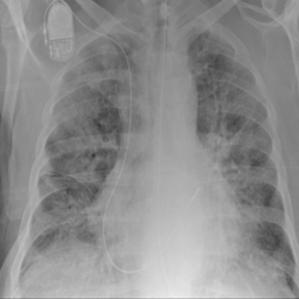

In [39]:
image_path = begin_path + 'test/covid/COVID-579.jpg'
original_image = Image.open(image_path)
og_width, og_height = original_image.size
original_image

# Resizing image for optimal performance
# new_width = int(og_width * .20) # 20% of the original size
# new_height = int(og_height * .20) # 20% of the original size

# resized_img = original_image.resize((new_width, new_height))
# print('Picture of normal: \n')
# resized_img

In [40]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = subfolders

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 [==============================] - 1s 514ms/step

Predicted Class: covid

Confidence Score: 1.0


In [41]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf  # Assuming `model` is a TensorFlow/Keras model
from sklearn.metrics import classification_report
from collections import Counter

# Load your model (ensure you have it defined or loaded elsewhere)
model = tf.keras.models.load_model(begin_path + 'covid_resnet_classifier_v2.h5')  # Update with actual model path

# Define the folder containing images
folder_path = begin_path + 'test/normal'  # Update with your folder path
labels = subfolders  # Assuming labels are subfolder names


output = []
# Iterate through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        image_path = os.path.join(folder_path, filename)

        # Open and preprocess the image
        original_image = Image.open(image_path)
        preprocessed_image = original_image.resize((256, 256))
        preprocessed_image = np.array(preprocessed_image) / 255.0

        # Make prediction
        preds = model.predict(np.expand_dims(preprocessed_image, axis=0))
        
        preds_class = np.argmax(preds)
        preds_label = labels[preds_class]
        output.append(preds_label)
        # # Print results
        # print(f'\nImage: {filename}')
        # print(f'Predicted Class: {preds_label}')
        # print(f'Confidence Score: {preds[0][preds_class]}')
counts = Counter(output)
TP = counts['normal']
FN = counts['covid']

folder_path = begin_path + 'test/covid'  # Update with your folder path
labels = subfolders  # Assuming labels are subfolder names


output = []
# Iterate through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        image_path = os.path.join(folder_path, filename)

        # Open and preprocess the image
        original_image = Image.open(image_path)
        preprocessed_image = original_image.resize((256, 256))
        preprocessed_image = np.array(preprocessed_image) / 255.0

        # Make prediction
        preds = model.predict(np.expand_dims(preprocessed_image, axis=0))
        
        preds_class = np.argmax(preds)
        preds_label = labels[preds_class]
        output.append(preds_label)
        # # Print results
        # print(f'\nImage: {filename}')
        # print(f'Predicted Class: {preds_label}')
        # print(f'Confidence Score: {preds[0][preds_class]}')
counts = Counter(output)
TN = counts['covid']
FP = counts['normal']

# Reconstruct y_true and y_pred
y_true = np.array([0] * (TN + FP) + [1] * (TP + FN))  # First class 0, then class 1
y_pred = np.array([0] * TN + [1] * FP + [0] * FN + [1] * TP)  # Predictions based on confusion matrix

# Generate classification report
print(classification_report(y_true, y_pred))

1/1 [==============================] - 0s 100ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       526
           1       0.99      1.00      1.00      1994

    accuracy                           0.99      2520
   macro avg       0.99      0.99      0.99      2520
weighted avg       0.99      0.99      0.99      2520



In [ ]:
#

In [ ]:
#%pip install pydot_ng

In [ ]:
#%pip install pydot

In [ ]:
%pip list

In [ ]:
import tensorflow.compat

In [ ]:
#%pip install jax==0.4.28
%pip install jax==0.5.1
# %pip install keras==2.14.0
# %pip install tensorflow.compat==2.16.1
